In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"Mall_Customers_dataset.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Objective
Customer segmentation deals with grouping clusters together based on some common patterns within their attributes. To keep the example simple and to visualize the clustering on a 2-D graph we will use only two attributes Annual Income and Spending Score. 

Apply Feature Scaling
Clustering algorithms like K-means require feature scaling of the data as part of data preprocessing to produce good results. This is because clustering techniques use distance calculation between the data points. Hence it is proper to bring data of different units under a common scale.

We have used MinMaxScaler for our example as shown below. In the new dataframe df_scale it can been seen that both attributes Annual Income and Spending Score are normalized.

In [4]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Annual Income (k$)','Spending Score (1-100)']);
df_scale.head(5)

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [5]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [7]:
km.cluster_centers_

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

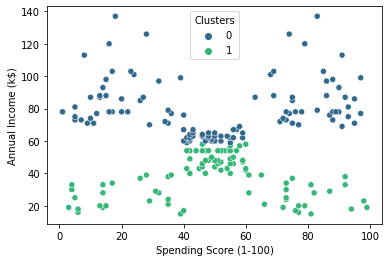

In [8]:
df['Clusters'] = km.labels_
sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')

Finding Optimum number of Clusters in K Means
The tricky part with K-Means clustering is you do not know in advance that in how many clusters the given data can be divided (hence it is an unsupervised learning algorithm). It can be done with the trial and error method but let us see a more proper technique for this.
i) Elbow Method with Within-Cluster-Sum of Squared Error (WCSS)
The Elbow Method is a popular technique for determining the optimal number of clusters. Here, we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for various values of k and choose the k for which WSS first starts to diminish. In the plot of WSS-versus-k, this can be observed as an elbow.

The Squared Error for a data point is the square of the distance of a point from its cluster center.
The WSS score is the summation of Squared Errors for all given data points.
Distance metrics like Euclidean Distance or the Manhattan Distance can be used.
Continuing with our example, we calculate the WCSS for K=2 to k=12 and calculate the WCSS in each iteration.

In [9]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

Let us now plot the WCSS vs K cluster graph. It can be seen below that there is an elbow bend at K=5 i.e. it is the point after which WCSS does not diminish much with the increase in value of K.

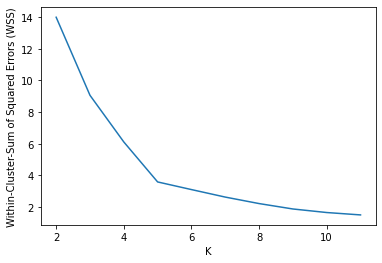

In [10]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

The Silhouette Method
The silhouette value measures the similarity of a data point within its cluster. It has a range between +1 and -1 and the higher values denote a good clustering.

Below we calculate the Silhouette Score for k=2 to 12 and it can be seen that the maximum value is for k=5. This is in line with the elbow method.

In [12]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
    +str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.33340205479521
Silhouette score for k(clusters) = 3 is 0.4514909309424474
Silhouette score for k(clusters) = 4 is 0.49620078745146784
Silhouette score for k(clusters) = 5 is 0.5594854531227246
Silhouette score for k(clusters) = 6 is 0.5380652777999084
Silhouette score for k(clusters) = 7 is 0.43787929453711455
Silhouette score for k(clusters) = 8 is 0.43074523601514214
Silhouette score for k(clusters) = 9 is 0.4421331695270676
Silhouette score for k(clusters) = 10 is 0.44563877983976935
Silhouette score for k(clusters) = 11 is 0.44293254541345917
Silhouette score for k(clusters) = 12 is 0.4427512711673661


In [13]:
#Applying Kmeans with 5 Clusters (K=5)
#Now that we have identified that the optimum value of K is 5
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

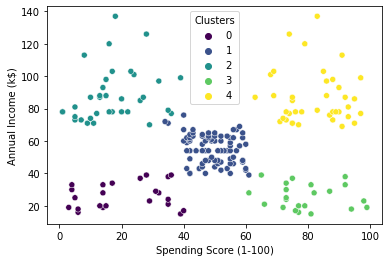

In [14]:
df['Clusters'] = kmeans.labels_

sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)",hue = 'Clusters',  data=df,palette='viridis')